In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras

# Verificar que la GPU está disponible
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print("GPU disponible.")
else:
    print("GPU no disponible.")


GPU no disponible.


In [2]:
# Crear la carpeta 'resultados' si no existe
if not os.path.exists('resultados'):
    os.makedirs('resultados')

In [3]:
# Cargar los datos
cleaned_data_path = '../datasets/cleaned_data.csv'
data_all = pd.read_csv(cleaned_data_path)

C:\Users\Ketbome\AppData\Local\Temp\ipykernel_20200\909222528.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data_all = pd.read_csv(cleaned_data_path)


In [4]:
data_all.head()

,ï»¿AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
0,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,6.6,98,P,P,0
1,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,6.2,85,P,P,0
2,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,6.3,86,P,P,0
3,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,6.3,100,P,P,0
4,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,6.7,100,P,P,0


In [5]:
data_all.describe()

,ï»¿AGNO,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,...,GEN_ALU,FEC_NAC_ALU,COD_REG_ALU,COD_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,COD_MEN
count,3092863.0,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,...,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06
mean,2022.0,1.165594e+04,4.451590e+00,9.405875e+00,9.599672e+01,9.606289e+03,9.458625e+01,2.844326e+00,1.950878e+00,7.923080e-02,...,1.487296e+00,2.009223e+05,9.477278e+00,9.674496e+03,2.710253e+01,2.844374e+01,2.844879e+03,6.016696e+00,8.791779e+01,1.256763e+06
std,0.0,9.040180e+03,2.880477e+00,4.006076e+00,3.985246e+01,3.988039e+03,3.941338e+01,1.103612e+00,9.592328e-01,2.700987e-01,...,4.998419e-01,5.383089e+02,4.022214e+00,4.004428e+03,1.165727e+02,1.223818e+02,1.224033e+04,6.925039e-01,1.147545e+01,8.217453e+06
min,2022.0,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.101000e+03,1.100000e+01,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,1.900010e+05,1.000000e+00,1.101000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2022.0,4.553000e+03,2.000000e+00,6.000000e+00,6.100000e+01,6.106000e+03,6.100000e+01,2.000000e+00,1.000000e+00,0.000000e+00,...,1.000000e+00,2.007010e+05,6.000000e+00,6.108000e+03,0.000000e+00,0.000000e+00,0.000000e+00,5.700000e+00,8.500000e+01,0.000000e+00
50%,2022.0,9.799000e+03,4.000000e+00,1.000000e+01,1.010000e+02,1.010100e+04,9.200000e+01,3.000000e+00,2.000000e+00,0.000000e+00,...,1.000000e+00,2.010020e+05,1.000000e+01,1.010700e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e+00,9.000000e+01,0.000000e+00
75%,2022.0,1.667300e+04,7.000000e+00,1.300000e+01,1.310000e+02,1.312200e+04,1.340000e+02,3.000000e+00,2.000000e+00,0.000000e+00,...,2.000000e+00,2.013020e+05,1.300000e+01,1.312200e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.500000e+00,9.500000e+01,0.000000e+00
max,2022.0,4.213000e+04,9.000000e+00,1.600000e+01,1.630000e+02,1.630500e+04,1.510000e+02,6.000000e+00,5.000000e+00,1.000000e+00,...,2.000000e+00,2.018120e+05,1.600000e+01,1.630500e+04,9.000000e+02,9.100000e+02,9.100500e+04,7.000000e+00,1.000000e+02,7.200700e+07


In [6]:
data_all.isna().sum()

ï»¿AGNO           0
RBD               0
DGV_RBD           0
NOM_RBD           0
COD_REG_RBD       0
NOM_REG_RBD_A     0
COD_PRO_RBD       0
COD_COM_RBD       0
NOM_COM_RBD       0
COD_DEPROV_RBD    0
NOM_DEPROV_RBD    0
COD_DEPE          0
COD_DEPE2         0
RURAL_RBD         0
ESTADO_ESTAB      0
COD_ENSE          0
COD_ENSE2         0
COD_GRADO         0
LET_CUR           0
COD_JOR           0
COD_TIP_CUR       0
COD_DES_CUR       0
MRUN              0
GEN_ALU           0
FEC_NAC_ALU       0
EDAD_ALU          0
COD_REG_ALU       0
COD_COM_ALU       0
NOM_COM_ALU       0
COD_RAMA          0
COD_SEC           0
COD_ESPE          0
PROM_GRAL         0
ASISTENCIA        0
SIT_FIN           0
SIT_FIN_R         0
COD_MEN           0
dtype: int64

In [7]:
data_all = data_all.dropna()

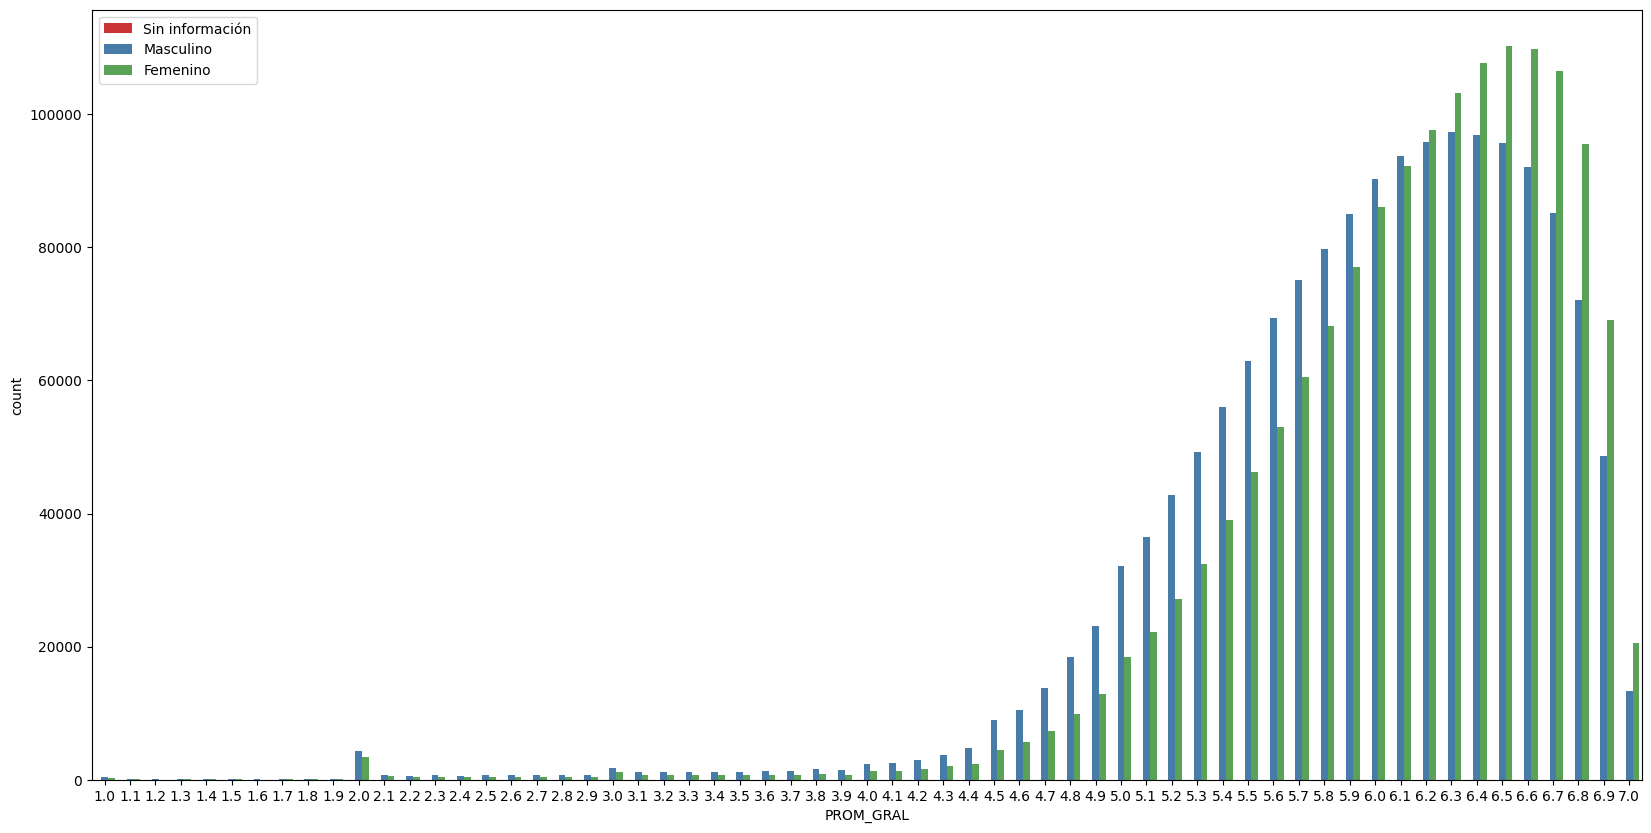

In [8]:
import seaborn as sb
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
sb.countplot(x='PROM_GRAL', data=data_all, hue='GEN_ALU', palette='Set1')
plt.legend(["Sin información", "Masculino", "Femenino"])


In [9]:
# Observar correlacion para hacer mas limpieza
numeric_columns = data_all.select_dtypes(include=np.number).columns

In [11]:
correlacion_all = data_all[numeric_columns].corr()

# Ver correlacion en base a valor a evaluar
correlacion_prom_gral = correlacion_all["PROM_GRAL"].sort_values(ascending=False)
correlacion_prom_gral

PROM_GRAL         1.000000
ASISTENCIA        0.365931
FEC_NAC_ALU       0.345680
GEN_ALU           0.117691
MRUN              0.054276
COD_DEPE          0.050323
COD_DEPE2         0.041195
RURAL_RBD         0.028171
COD_TIP_CUR       0.023564
DGV_RBD          -0.003223
COD_REG_ALU      -0.007102
COD_COM_ALU      -0.007472
COD_REG_RBD      -0.012076
COD_COM_RBD      -0.012190
COD_PRO_RBD      -0.012213
COD_DEPROV_RBD   -0.019578
RBD              -0.032461
COD_GRADO        -0.043880
COD_MEN          -0.060024
COD_JOR          -0.085738
COD_DES_CUR      -0.096366
COD_SEC          -0.107000
COD_ESPE         -0.107001
COD_RAMA         -0.107364
COD_ENSE         -0.254239
COD_ENSE2        -0.269109
ï»¿AGNO                NaN
ESTADO_ESTAB           NaN
Name: PROM_GRAL, dtype: float64

In [12]:
# Columnas
#['ï»¿AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_PRO_RBD', 'COD_COM_RBD', 
#'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
#'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'LET_CUR', 'COD_JOR',
#'COD_TIP_CUR', 'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'FEC_NAC_ALU',
#'EDAD_ALU', 'COD_REG_ALU', 'COD_COM_ALU', 'NOM_COM_ALU', 'COD_RAMA',
#'COD_SEC', 'COD_ESPE', 'PROM_GRAL', 'ASISTENCIA', 'SIT_FIN',
#'SIT_FIN_R', 'COD_MEN']

# Hacer data = data_all con las columnas a usar EDAD_ALU, GEN_ALU, PROM_GRAL
data = data_all[['COD_COM_RBD', 'COD_DEPE2', 'RURAL_RBD', 'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'GEN_ALU', 'EDAD_ALU', 'PROM_GRAL', 'ASISTENCIA']]

In [13]:
# Convertir la columna a números, los valores inválidos se convierten en NaN
data['EDAD_ALU'] = pd.to_numeric(data['EDAD_ALU'], errors='coerce')

# Eliminar las filas con NaN en la columna 'EDAD_ALU'
data = data.dropna(subset=['EDAD_ALU'])

# Borrar las personas que tengan mas de 20 años
data = data[data['EDAD_ALU'] <= 20]

C:\Users\Ketbome\AppData\Local\Temp\ipykernel_20200\411012605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EDAD_ALU'] = pd.to_numeric(data['EDAD_ALU'], errors='coerce')


In [14]:
data.head()

,COD_COM_RBD,COD_DEPE2,RURAL_RBD,COD_ENSE2,COD_GRADO,COD_JOR,GEN_ALU,EDAD_ALU,PROM_GRAL,ASISTENCIA
7,15101,5,0,7,1,1,1,14.0,4.5,85
8,15101,5,0,7,1,1,1,15.0,5.1,89
9,15101,5,0,7,1,1,1,16.0,5.3,89
10,15101,5,0,7,1,1,2,16.0,5.9,90
11,15101,5,0,7,1,1,1,14.0,5.7,90


<Axes: >

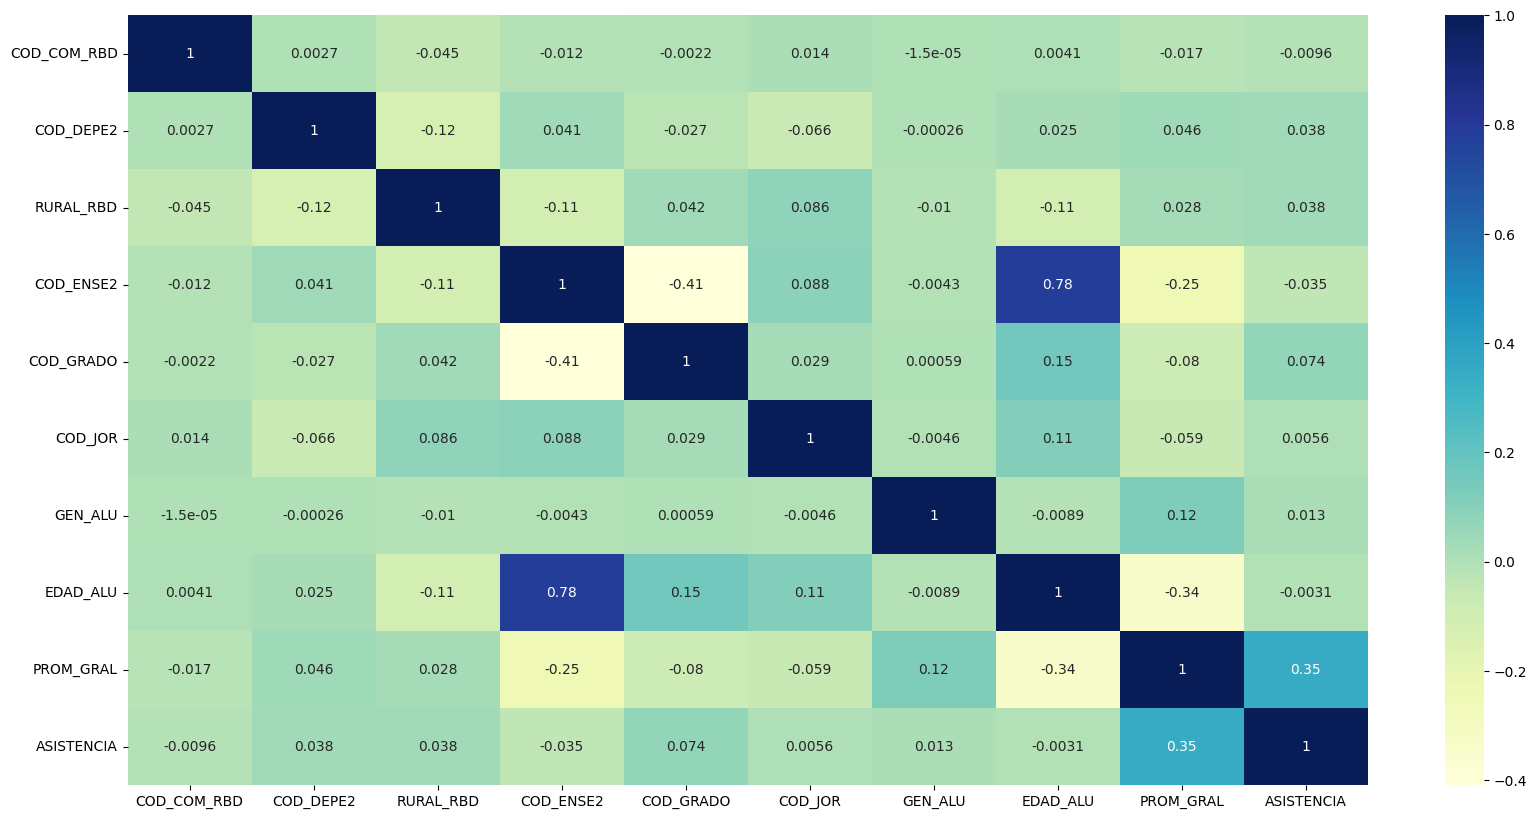

In [15]:
#Observar correlacion para hacer mas limpieza
plt.figure(figsize=(20,10))
sb.heatmap(data.corr(), annot=True, cmap='YlGnBu')


In [16]:
# Ver correlacion en base a valor a evaluar
data.corr()["PROM_GRAL"].sort_values(ascending=False)

PROM_GRAL      1.000000
ASISTENCIA     0.345738
GEN_ALU        0.123678
COD_DEPE2      0.045512
RURAL_RBD      0.028110
COD_COM_RBD   -0.017178
COD_JOR       -0.058987
COD_GRADO     -0.080422
COD_ENSE2     -0.245983
EDAD_ALU      -0.337581
Name: PROM_GRAL, dtype: float64

In [17]:
# Saber cuantas filas hay y columnas
pd.DataFrame([data.shape], columns=['Filas', 'Columnas'])

,Filas,Columnas
0,3021404,10


In [18]:
# División de datos
X = data.drop(columns=['PROM_GRAL'])
y = data['PROM_GRAL']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import layers

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Ajustar y transformar
X_test_scaled = scaler.transform(X_test) # Solo transformar

In [20]:
from tensorflow.keras.utils import to_categorical

# Convertir todas las etiquetas a una representación categórica
y_train_categorical = to_categorical(y_train*10 - 10)

In [50]:
#GridSearch
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer


def build_classifier(optimizer, units, num_layers):
    regressor = Sequential()
    regressor.add(InputLayer(input_shape=(X_train_scaled.shape[1],)))
    for i in range(num_layers):
        regressor.add(Dense(units=units, activation='relu'))
    regressor.add(Dense(units=1, activation='softmax'))
    regressor.compile(optimizer=optimizer, loss='categorical_crossentropy',  metrics=['accuracy', 'mse'])
    return regressor


parameters = {'batch_size': [256, 512, 1024],
              'epochs': [30, 50, 100],
              'validation_split': [0.2],
              'verbose': [1],
              'optimizer': ['adam', 'rmsprop'],
              'units': [64, 128, 288],
              'num_layers': [1, 2]}
grid_search = GridSearchCV(estimator=KerasClassifier(model=build_classifier, optimizer=parameters['optimizer'], num_layers=parameters['num_layers'], units = parameters['units']),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5, # Numero de folds
                           verbose=1
                           )

In [51]:
# Entrenamiento
grid_search = grid_search.fit(X_train_scaled, y_train_categorical)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
# Mejores parámetros
best_parameters = grid_search.best_params_
print(best_parameters)

In [ ]:
# Guardar el modelo
modelo.save("./models/RedNeuronal.h5")
# Guardar el modelo
modelo.save("./models/nn_model")

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: ./models/nn_model\assets


INFO:tensorflow:Assets written to: ./models/nn_model\assets


In [ ]:
pd.DataFrame([X_test.shape], columns=['Filas', 'Columnas'])

,Filas,Columnas
0,604281,9


In [ ]:
# Hacer una predicción
predicciones = modelo.predict(X_test_scaled)

# Las predicciones son probabilidades para cada clase, así que tomamos la clase con la mayor probabilidad
clases_predichas = np.argmax(predicciones, axis=1)

# Convertir las clases predichas a las etiquetas originales
etiquetas_predichas = (clases_predichas / 10) + 1

18884/18884 [==============================] - 25s 1ms/step


In [ ]:
# Calcular el error absoluto medio
mae = mean_absolute_error(y_test, etiquetas_predichas)
print('MAE: %.3f' % mae)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, etiquetas_predichas)
print('MSE: %.3f' % mse)

# Calcular el coeficiente de determinación
r2 = r2_score(y_test, etiquetas_predichas)
print('R2: %.3f' % r2)

MAE: 0.417
MSE: 0.321
R2: 0.214


In [ ]:
# Métricas de evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.2872638260655311
MAE: 0.41172024028354637
R2: 0.2965976359876207


In [ ]:
# Guardar los resultados
results = pd.DataFrame({'Modelo': ['Neural Network'],
                        'MSE': [mse],
                        'MAE': [mae],
                        'R2': [r2]})
results.to_csv('resultados/RedNeuronal.csv', index=False)
